In [1]:
import xarray as xr
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import HourLocator
import cmocean

In [2]:
root = "ipfs://QmfAzqPtR99owGURk27JV4Vgwun1CxRpKjomtkBxYufv5b"
dset_meteo = xr.open_dataset(f"{root}/DShip.zarr",engine="zarr")
dset_disdro = xr.open_dataset(
    f"{root}/disdrometer/DSD_METEOR_merged.zarr",engine="zarr")
dset_sea_snake = xr.open_dataset(f"{root}/SeaSnake/met_203_1_SeaSnake.zarr",engine="zarr")
dset_termo = xr.open_dataset(f"{root}/thermosalinograph/met_203_1_tsal.zarr",engine="zarr")
dset_lidart = xr.open_dataset(f"{root}/LICHT-LIDAR_t.zarr",engine="zarr")
dset_lidart_sel = dset_lidart.sel(time= slice('2024-09-08 06 ','2024-09-08 17:00:00'),alt=slice(0,600))

In [3]:
sea_pool_file = '/Users/hans/Documents/bow_tie/SEA-POOL/SEA-POL_gridded_rainrate_spatial_means_masked.nc'
dset_pool = xr.open_dataset(sea_pool_file,chunks='auto' )

In [4]:
sea_pool_qv_file = '/Users/hans/Documents/bow_tie/SEA-POOL/qvp_1D.nc'
dset_pool_qv = xr.open_dataset(sea_pool_qv_file,chunks='auto' )

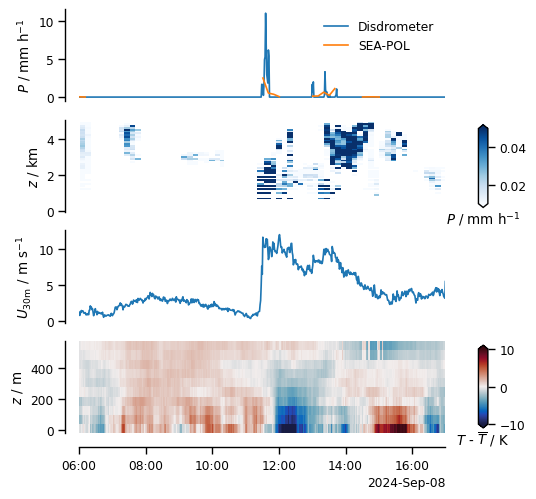

In [8]:
sns.set_context("paper")
fig = plt.figure(figsize=(12/2.54,14/2.54),facecolor='white')
ax1=fig.add_axes([0.97,0.52,0.02,0.15])

ax2=fig.add_axes([0.97,0.12,0.02,0.15])

ax= fig.add_subplot(411)
dset_disdro.rain_rate_qc.sel(
    time=slice('2024-09-08 06:00','2024-09-08 17:00')).plot(label='Disdrometer')
dset_pool.rain1_int.sel(
    time=slice('2024-09-08 06:00','2024-09-08 17:00')).plot(label='SEA-POL')

ax.set_xlabel(None)
ax.set_xlim([dset_lidart_sel.time[0],dset_lidart_sel.time[-1]])
ax.set_xticks([])
ax.set_xticklabels({})
ax.set_ylabel(r'$P$ / mm h$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.spines['bottom'].set_visible(False)
plt.legend(frameon=False)

ax= fig.add_subplot(412)
plot_seapool = dset_pool_qv.assign_coords({'Z':dset_pool_qv.Z.values/1000}).rainrate_int.sel(
    time=slice('2024-09-08 06:00','2024-09-08 17:00'),Z=slice(0,5)).plot(
    x='time',vmin=0.01,vmax=0.05,cmap='Blues',add_colorbar=False)
ax.set_xlim([dset_lidart_sel.time[0],dset_lidart_sel.time[-1]])
sns.despine(offset=10,ax=ax)
ax.set_xticks([])
ax.set_xticklabels({})
ax.spines['bottom'].set_visible(False)
ax.set_ylabel(r'$z$ / km')

ax= fig.add_subplot(413)
dset_meteo.wspd.sel(time=slice('2024-09-08 06','2024-09-08 17:00')).plot()
ax.set_xlabel(None)
ax.set_xlim([dset_lidart_sel.time[0],dset_lidart_sel.time[-1]])
ax.set_xticks([])
ax.set_xticklabels({})
ax.set_ylabel(r'$U_\mathrm{30m}$ / m s$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.spines['bottom'].set_visible(False)

ax= fig.add_subplot(414)
plot_cb = (dset_lidart_sel.ta -dset_lidart_sel.ta.mean('time')).plot(
    y='alt',
    cmap=cmocean.cm.balance,
    vmin=-10,vmax=10,
    add_colorbar=False)
ax.set_xlim([dset_lidart_sel.time[0],dset_lidart_sel.time[-1]])
sns.despine(offset=10,ax=ax)
plt.subplots_adjust(hspace=0.2)
ax.xaxis.set_major_locator(HourLocator(byhour=range(0,24,2)))
ax.set_ylabel(r'$z$ / m')
ax.set_xlabel(None)

b1 = plt.colorbar(plot_seapool,
                  extend='both',
                  orientation='vertical',
                  cax=ax1,shrink=0.8,pad=0.09)
b1.ax.set_xlabel(r"$P$ / mm h$^{-1}$");

b2 = plt.colorbar(plot_cb,
                  extend='both',
                  orientation='vertical',
                  cax=ax2,shrink=0.8,pad=0.09)
b2.ax.set_xlabel(r"$T$ - $\overline{T}$ / K");
b2.ax.set_yticks([-10,0,10])

plt.savefig('../../../figures/precip_wind_temp_wind_gust.pdf',
            format='pdf',bbox_inches='tight',orientation={'landscape'})

In [35]:
root_radio = 'ipfs://QmSUUUPcGcpwdJJCVDGPGYksLsqkWbfh6d6xFcTk2Qu7Zf'
dset_radio = xr.open_dataset(
    f"{root_radio}/RAPSODI_RS_ORCESTRA_level2.zarr",engine="zarr")

In [36]:
dset_rad_meteor= dset_radio.where(
    (dset_radio.platform=='RV_Meteor') & (dset_radio.ascent_flag==0),drop=True)

In [54]:
dset_rad_sel = dset_rad_meteor.sel(
    launch_time=slice('2024-09-08 08 ','2024-09-08 17:00:00'),
    alt=slice(0,1000))

In [55]:
colormap = plt.cm.Blues #nipy_spectral, Set1,Paired  

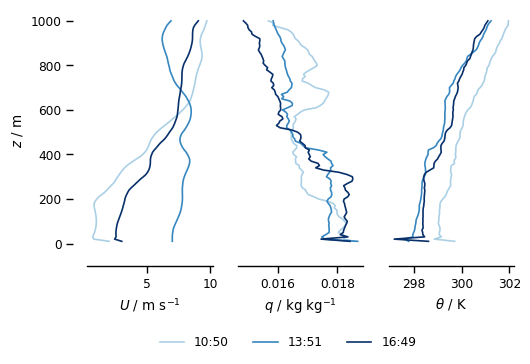

In [159]:
sns.set_context("paper")
fig = plt.figure(figsize=(14/2.54,8/2.54),facecolor='white')
ax= fig.add_subplot(131)
[dset_rad_sel.wspd.isel(launch_time=idx).plot(y='alt',
                label=dset_rad_sel.launch_time.isel(launch_time=idx).dt.strftime('%H:%M').values ) \
 for idx in range(dset_rad_sel.launch_time.shape[0])]
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines)+1)]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i+1])
ax.set_ylabel('$z$ / m')
ax.set_xlabel(r'$U$ / m s$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.spines['left'].set_visible(False)
ax.set_title(None)

ax= fig.add_subplot(132)
[dset_rad_sel.q.isel(launch_time=idx).plot(y='alt',
                label=dset_rad_sel.launch_time.isel(launch_time=idx).dt.strftime('%H:%M').values ) \
 for idx in range(dset_rad_sel.launch_time.shape[0])]
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines)+1)]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i+1])
ax.set_ylabel(None)
ax.set_xlabel(r'$q$ / kg kg$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.set_title(None)

ax= fig.add_subplot(133)
[dset_rad_sel.theta.isel(launch_time=idx).plot(y='alt',
                label=dset_rad_sel.launch_time.isel(launch_time=idx).dt.strftime('%H:%M').values ) \
 for idx in range(dset_rad_sel.launch_time.shape[0])]
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines)+1)]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i+1])
ax.set_ylabel(None)
ax.set_yticks([])
ax.set_xlabel(r'$\theta$ / K')
sns.despine(offset=10,ax=ax)
ax.spines['left'].set_visible(False)
ax.set_title(None)

ax.legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),
          ncol=5,frameon=False)

plt.savefig('../../../figures/radiosondes_wind_gust.pdf',
            format='pdf',bbox_inches='tight',orientation={'landscape'})

In [25]:
dset_ctd = xr.open_dataset(f"{root}/CTD.zarr",engine="zarr")

In [26]:
dset_ctd_new = dset_ctd.assign_coords({'SOUNDING':dset_ctd.TIME.values}) 

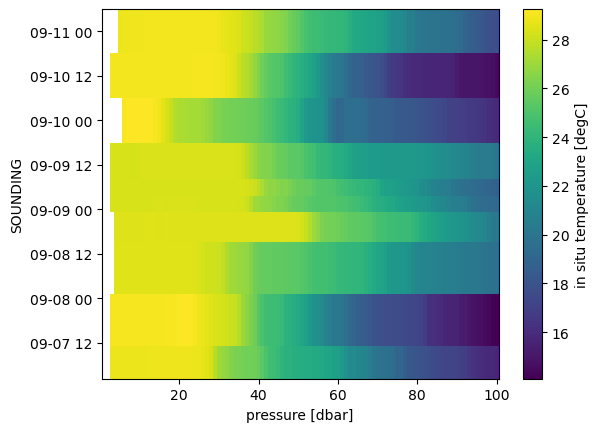

In [33]:
dset_ctd_new.TEMP.sel(
    SOUNDING=slice('2024-09-07','2024-09-12 00:00'),PRES=slice(0,100)).plot()

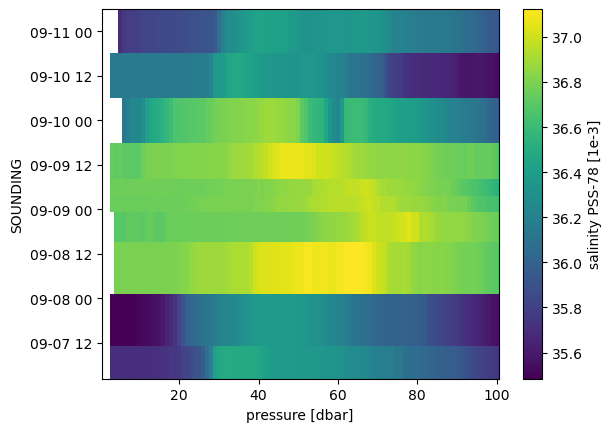

In [34]:
dset_ctd_new.PSAL.sel(
    SOUNDING=slice('2024-09-07','2024-09-12 00:00'),PRES=slice(0,100)).plot()

In [59]:
dset_lidart = xr.open_dataset(f"{root}/LICHT-LIDAR_t.zarr",engine="zarr")

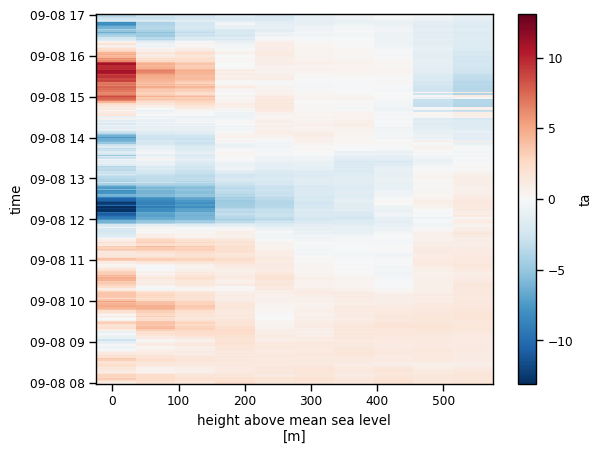

In [79]:
dset_lidart_sel = dset_lidart.sel(time= slice('2024-09-08 08 ','2024-09-08 17:00:00'),alt=slice(0,600))
(dset_lidart_sel.ta -dset_lidart_sel.ta.mean('time')).plot()

In [80]:
dset_celio = xr.open_dataset(f"{root}/ceilometer/CHM170158.zarr",engine="zarr")

In [9]:
dset_pool

<xarray.Dataset> Size: 178kB
Dimensions:       (time: 4447)
Coordinates:
  * time          (time) datetime64[ns] 36kB 2024-08-16T08:10:52.949000192 .....
Data variables:
    rain245_mean  (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain120_mean  (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain60_mean   (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain1_mean    (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain245_int   (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain120_int   (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain60_int    (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
    rain1_int     (time) float32 18kB dask.array<chunksize=(4447,), meta=np.ndarray>
Attributes:
    title:        Spatial mean rainrate from SEA-POL long-range, low-elevatio...
    description:  Spatial means of rainrate from SEA-POL long-range, low-elev...
    source:       SEA-POL Level4a Gridded Rain Rate
    units:        mm/h

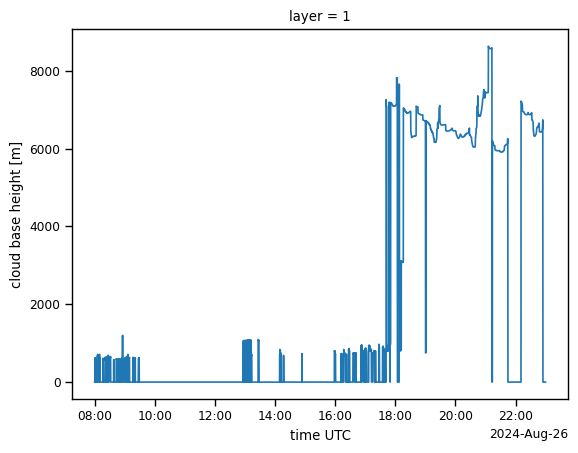

In [160]:
dset_celio.cbh.sel(time= slice('2024-08-26 08 ','2024-08-26 23:00:00'),layer=1).plot()

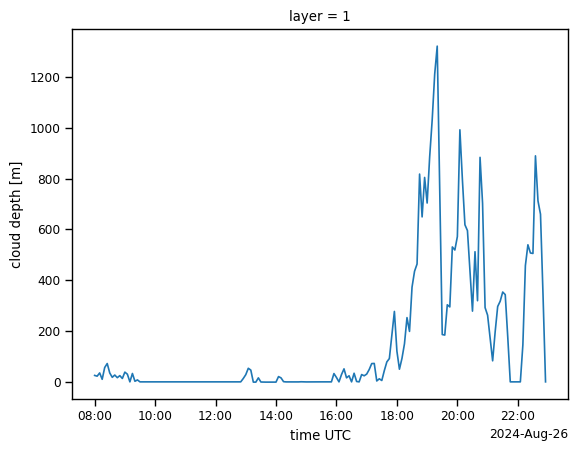

In [108]:
dset_celio.cdp.sel(time= slice('2024-08-26 08 ','2024-08-26 23:00:00'),layer=1).resample(time='5min').mean().plot()

In [7]:
dset_pool_qv

<xarray.Dataset> Size: 11MB
Dimensions:       (time: 4983, Z: 181)
Coordinates:
  * time          (time) datetime64[ns] 40kB 2024-08-16T08:20:05.026000128 .....
  * Z             (Z) float32 724B 0.0 100.0 200.0 ... 1.78e+04 1.79e+04 1.8e+04
Data variables:
    rainrate_avg  (time, Z) float32 4MB dask.array<chunksize=(4983, 181), meta=np.ndarray>
    dbz_avg       (time, Z) float32 4MB dask.array<chunksize=(4983, 181), meta=np.ndarray>
    rainrate_int  (time, Z) float32 4MB dask.array<chunksize=(4983, 181), meta=np.ndarray>
Attributes:
    title:        Average rain rate and reflectivity at each altitude from SE...
    description:  Spatial means of rainrate from SEA-POL 45 degree elevation ...
    source:       SEA-POL Level4a QVP Volume

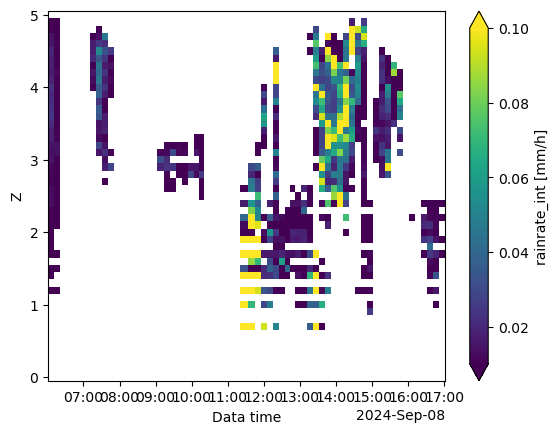

In [18]:
dset_pool_qv.assign_coords({'Z':dset_pool_qv.Z.values/1000}).rainrate_int.sel(
    time=slice('2024-09-08 06:00','2024-09-08 17:00'),Z=slice(0,5)).plot(
    x='time',vmin=0.01,vmax=0.1)